## Preprocessing

In [32]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Starter_Code/charity_data.csv")
application_df.head(11)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [33]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(["EIN", "NAME"], axis = 1)

In [34]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [35]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_count= application_df["APPLICATION_TYPE"].value_counts()
app_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [36]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

application_types_to_replace = app_count[app_count<500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [37]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_count = application_df["CLASSIFICATION"].value_counts()
class_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [38]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_count[class_count>1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [39]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

classifications_to_replace = class_count[class_count<1883].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [40]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
dummies_df =pd.get_dummies(application_df)
dummies_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [41]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y=dummies_df["IS_SUCCESSFUL"].values 
X=dummies_df.drop("IS_SUCCESSFUL", axis = 1)
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)

In [42]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_layer = len(X_train_scaled[0])
hidden_layer_1= 80
hidden_layer_2 = 30

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_layer_1, activation="relu", input_dim = input_layer))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_layer_2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5981 (23.36 KB)
Trainable params: 5981 (23.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])


In [50]:
# Train The Model
# YOUR CODE HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
719/719 [==============================] - 2s 3ms/step - loss: 0.5333 - accuracy: 0.7413
Epoch 2/100
719/719 [==============================] - 2s 2ms/step - loss: 0.5337 - accuracy: 0.7416
Epoch 3/100
719/719 [==============================] - 2s 2ms/step - loss: 0.5338 - accuracy: 0.7406
Epoch 4/100
719/719 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7419
Epoch 5/100
719/719 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7413
Epoch 6/100
719/719 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.7414
Epoch 7/100
719/719 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7415
Epoch 8/100
719/719 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7423
Epoch 9/100
719/719 [==============================] - 2s 2ms/step - loss: 0.5334 - accuracy: 0.7409
Epoch 10/100
719/719 [==============================] - 2s 2ms/step - loss: 0.5331 - accura

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

354/354 - 1s - loss: 0.5618 - accuracy: 0.7253 - 631ms/epoch - 2ms/step
Loss: 0.5618221759796143, Accuracy: 0.7253291010856628


<Axes: >

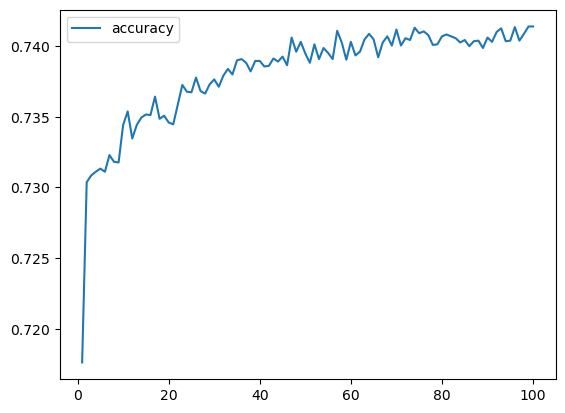

In [49]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save("./modelKERAS.keras")

# Rest of your code remains unchanged

plot_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss']) + 1))
plot_df.plot(y='accuracy')